# Test 2: Pandas

 - open book
 - 100 points
 - due by today's midnight



### Election Dataset:
   - Election dataset contains donation data for 2012 Presidential Election. 
      
      
   - The dataset can be downloaded from our book's github.
   
   https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/fec/P00000001-ALL.csv
     
     
   - Originally Data is also available in Federal Election Commission webpage. 
     
     
   - For your convenience, it is also available from Blackboard, named <span class="mark">"Election.csv</span>".
    
**Now, let's do some analyses on this dataset.**


In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# you can add more libraries if needed

---
## (0) Load and view DATA <span class="mark">(15%)</span>

#### First, please download the data file "Election.csv" and save it to your local disck



In [2]:
# Read in the "Election.csv" file and assign the dataset to a dataframe named df
# You will get warning about the Columns (6). We will take care of it later


## <Your code>  

df = pd.read_csv('Election.csv')
df.head()

C:\Users\andri\AppData\Local\Temp\ipykernel_7840\2172038992.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/andri/Election.csv')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-Jun-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,1-Aug-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166


In [3]:
# Check dataframe df shape: (1001731, 16)
df.shape



(1001731, 16)

In [4]:
# Show first 5 rows of the df
df.head(5)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-Jun-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,1-Aug-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-Jun-11,NaN,NaN,NaN,SA17A,736166


In [5]:
# List all col names of the df

df.columns


Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [6]:
# what are the last 10 df indices? (do not show more than 10 indices) 

df.tail(10)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
1001721,C00500587,P20003281,"Perry, Rick","HANSEN, STEVE MR.",CHEYENNE,WY,820013163,TEXAS ENERGY LLC,EXECUTIVE,250.0,15-Nov-11,NaN,X,SEE ATTRIBUTION,SA17A,772060
1001722,C00500587,P20003281,"Perry, Rick","HARDER, ROBERT",POWELL,WY,824359238,NaN,RETIRED,100.0,29-Oct-11,NaN,NaN,NaN,SA17A,772060
1001723,C00500587,P20003281,"Perry, Rick","HARDER, ROBERT",POWELL,WY,824359238,NaN,RETIRED,100.0,30-Nov-11,NaN,NaN,NaN,SA17A,772060
1001724,C00500587,P20003281,"Perry, Rick","HEFFERNAN, JILL PRINCE MRS.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,30-Sep-11,NaN,NaN,NaN,SA17A,751678
1001725,C00500587,P20003281,"Perry, Rick","ELWOOD, MIKE MR.",INFO REQUESTED,XX,99999,AM COAL,ENGINEER,2500.0,30-Sep-11,NaN,NaN,NaN,SA17A,751678
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-Sep-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-Sep-11,NaN,NaN,NaN,SA17A,751678
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-Sep-11,NaN,NaN,NaN,SA17A,751678
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-Sep-11,NaN,NaN,NaN,SA17A,751678
1001730,C00500587,P20003281,"Perry, Rick","ANDERSON, MARILEE MRS.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,2500.0,31-Aug-11,NaN,NaN,NaN,SA17A,751678


In [7]:
#Check df info 


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [8]:
# Describe df

df.describe()


,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


---


## (1) DATA  PREPARATION <span class="mark">(10%)</span>
 - drop some irrelevant columns
 - check missing values again
 


In [9]:
# (1) create df1 by droping df's first two and the last 6 columns


# or df1 = keep only 8 columns: from "cand_nm" to "contb_receipt_amt" 

df1 = df.drop(df.columns[[0, 1, -1, -2, -3, -4, -5, -6]], axis = 1)

# chekc the df1's shape again 
df1.shape


(1001731, 8)

In [10]:
#display df1.head()
df1.head()


,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0


In [11]:
# (2.1)  check and dispay the number of missing values for each column in df1

for i in df1.columns:
    print(f"The number of missing values in {i} column is {df1[i].isnull().sum()}")

# (2.2) what is the total number of missing data (all missing data cells)

print(f"The total number of missing values is {df1.isnull().sum().sum()}")

The number of missing values in cand_nm column is 0
The number of missing values in contbr_nm column is 0
The number of missing values in contbr_city column is 19
The number of missing values in contbr_st column is 4
The number of missing values in contbr_zip column is 111
The number of missing values in contbr_employer column is 13729
The number of missing values in contbr_occupation column is 8430
The number of missing values in contb_receipt_amt column is 0
The total number of missing values is 22293


In [12]:
# (3) find out how many rows which have one or more missing value(s) in df1



print("The number of rows with at least one missing value is", df1.shape[0] - df1.dropna().shape[0])

The number of rows with at least one missing value is 15109


---

##  (2) For df1: STATISTICS and PLOTING <span class="mark">(20%)</span>
 #### <span class="mark">For now, we like to keep the rows with missing values.</span>  



In [13]:
# For column "contb_receipt_amt" in df1:   find 'max', 'min', 'mean', 'std'  and print them out
# use aggregation or agg 

df1.agg({'contb_receipt_amt': ['max', 'min', 'mean', 'std']})


,contb_receipt_amt
max,2.014491e+06
min,-3.080000e+04
mean,2.982352e+02
std,3.749667e+03


In [14]:
# For the "contb_receipt_amt" column in df1 again: 

# (1) there are some negative data, assuming they are refund (I guess)
# print out how many

print("There are", 
      df1['contb_receipt_amt'].loc[df1['contb_receipt_amt']<0].count(),
      "negative data in column 'contb_receipt_amt'")

# (2) there are aslo some rows which are zeros
# print out how many 

print("There are", 
      df1['contb_receipt_amt'].loc[df1['contb_receipt_amt']==0].count(),
      "zeros in column 'contb_receipt_amt'")

# (3) Also find and print how many donations which are positive 
print("There are", 
      df1['contb_receipt_amt'].loc[df1['contb_receipt_amt']>0].count(),
      "positive donations")

There are 9647 negative data in column 'contb_receipt_amt'
There are 609 zeros in column 'contb_receipt_amt'
There are 991475 positive donations


<AxesSubplot:>

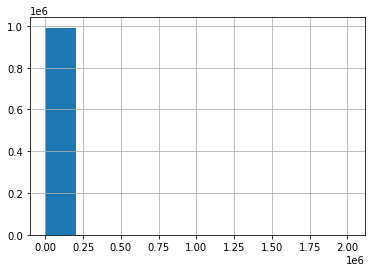

In [15]:
# For col "contb_receipt_amt": plot histgram (use only positive donations)




df1['contb_receipt_amt'].loc[df1['contb_receipt_amt']>0].hist()


In [16]:
# The graph above looks not good because some donations are big numbers. 

# How many donations are higher than $10K? 



print("The number of donations that are higher than $10K is:",
      df1['contb_receipt_amt'].loc[df1['contb_receipt_amt']>10000].count())

The number of donations that are higher than $10K is: 12


<AxesSubplot:>

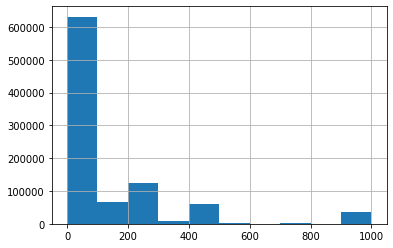

In [17]:
# Plot again the histgram of "contb_receipt_amt": value in the range of larger than $0 but less than or equal to $1000  






df1['contb_receipt_amt'].loc[(df1['contb_receipt_amt']>0) & (df1['contb_receipt_amt']<=1000)].hist()

---


## (3) df2: Group by candidates and values sorting<span class="mark">(10%)</span>

In [18]:
# (1) Start from df1, select only "cand_nm","contbr_nm", "contb_receipt_amt" columns, then name them as df2

df2 = df1[["cand_nm","contbr_nm", "contb_receipt_amt"]]

# Then display df2.head()
 


df2.head()

,cand_nm,contbr_nm,contb_receipt_amt
0,"Bachmann, Michelle","HARVEY, WILLIAM",250.0
1,"Bachmann, Michelle","HARVEY, WILLIAM",50.0
2,"Bachmann, Michelle","SMITH, LANIER",250.0
3,"Bachmann, Michelle","BLEVINS, DARONDA",250.0
4,"Bachmann, Michelle","WARDENBURG, HAROLD",300.0


In [19]:
# (2) Find and display the df2's top 15 records in "contb_receipt_amt"



df2.sort_values("contb_receipt_amt", ascending=False).head(15)

,cand_nm,contbr_nm,contb_receipt_amt
325136,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,2014490.51
326651,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,1944042.43
344539,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,1679114.65
344419,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,1511192.17
319478,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,526246.17
335187,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,512710.91
257270,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,451726.00
114754,"Obama, Barack","MURPHY, CYNTHIA C.",33300.00
217891,"Obama, Barack","DAVIS, STEPHEN JAMES",25800.00
834301,"Paul, Ron",LIBERTY PAC,25000.00


In [20]:
# (3) find out the total "contb_receipt_amounts" of each candidate received, 
# then display the total amounts in descending order with candiate names  


grouped = df2.groupby("cand_nm")["contb_receipt_amt"].sum()
grouped.sort_values(ascending=False, inplace = True)
grouped

cand_nm
Obama, Barack                     1.335026e+08
Romney, Mitt                      8.521925e+07
Paul, Ron                         2.072257e+07
Perry, Rick                       1.841151e+07
Gingrich, Newt                    1.201183e+07
Santorum, Rick                    1.072809e+07
Cain, Herman                      7.047265e+06
Pawlenty, Timothy                 4.255054e+06
Huntsman, Jon                     3.204350e+06
Bachmann, Michelle                2.677435e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.674575e+05
McCotter, Thaddeus G              3.703000e+04
Name: contb_receipt_amt, dtype: float64

<AxesSubplot:xlabel='cand_nm'>

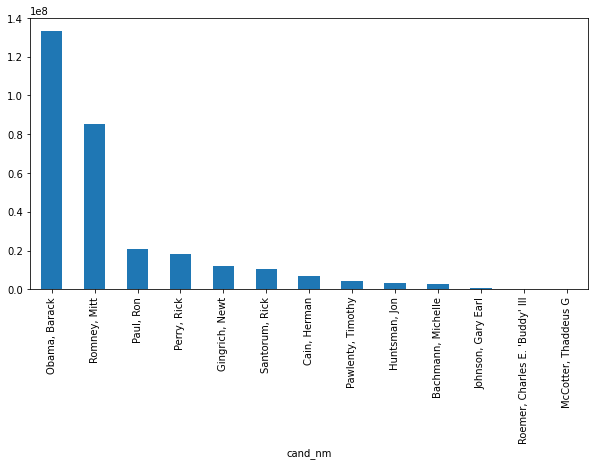

In [21]:
# (4) Plot bar chart for the total amounts for all candidates in descending order



grouped.plot(kind = 'bar', figsize = (10, 5))

## (4) df3, df4, df5: Group by states and values sorting<span class="mark">(15%)</span>

In [22]:
# From df1:  find total amount of "contb_receipt_amt" for each state, then then name it as df3

df3 = df1.groupby("contbr_st")["contb_receipt_amt"].sum()


# display df3

df3

contbr_st
AA      51066.20
AB       2048.00
AE     118010.08
AF        495.00
AK     591919.67
         ...    
WI    2066481.48
WV     612923.97
WY     702642.06
XX     448397.00
ZZ      35408.22
Name: contb_receipt_amt, Length: 74, dtype: float64

In [23]:
##  CODE GIVEN ##

# df3 above shows that there are 74 contribution states (some are not among the US 50 states pluse DC.)

# we read in US code_2 (file name: states_code2.csv) first, then merge two dfs to get 5:
df_code2 = pd.read_csv("states_code2.csv", usecols=[1, 2], index_col = 1) 
df_code2.index.name="contbr_st"


print("All US states:", len(df_code2))
df_code2.head()



All US states: 51


,State
contbr_st,
AL,Alabama
AK,Alaska
AZ,Arizona
AR,Arkansas
CA,California


In [24]:
# Please use df_code2 and df3 to create a dataframe df4 which holds only 51 US states' contributions (use join or merge) 


df4 = pd.merge(df3,df_code2,on='contbr_st')
# diplay df4

print(df4)

# df4.shape 

print("df4 shape:", df4.shape)


           contb_receipt_amt                 State
contbr_st                                         
AK                 591919.67                Alaska
AL                1801841.62               Alabama
AR                 793337.44              Arkansas
AZ                4847466.40               Arizona
CA               43118223.68            California
CO                5097332.53              Colorado
CT                6249305.60           Connecticut
DC                5645902.42  District of Columbia
DE                 526175.93              Delaware
FL               20904918.76               Florida
GA                7727072.36               Georgia
HI                1112583.23                Hawaii
IA                1510172.38                  Iowa
ID                1304392.12                 Idaho
IL               22011790.66              Illinois
IN                2197188.93               Indiana
KS                1397177.88                Kansas
KY                1848325.55   

<AxesSubplot:xlabel='contbr_st'>

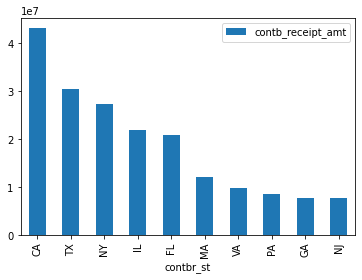

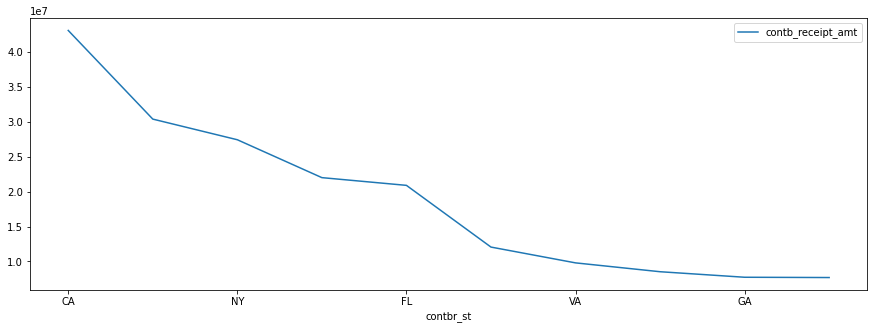

In [25]:
# plot the top 10 US states in "contb_receipt_amt"



df4.sort_values('contb_receipt_amt', ascending = False).head(10).plot(kind='bar')
df4.sort_values('contb_receipt_amt', ascending = False).head(10).plot(figsize = (15,5))

In [26]:
# (optional) find all other states which are not in the 51 states.
ser1 = pd.Series(df4.index)
ser2 = pd.Series(df3.index)
union = pd.Series(np.union1d(ser1, ser2))
intersect = pd.Series(np.intersect1d(ser1, ser2))
other_states = union[~union.isin(intersect)]
# print  them out

print(other_states)

0     AA
1     AB
2     AE
3     AF
6     AP
8     AS
10    BR
16    FF
18    FM
20    GU
35    MP
44    NS
49    ON
52    PE
53    PR
54    QU
58    SO
59    TE
62    UK
65    VI
68    WE
72    XX
73    ZZ
dtype: object


---

## (5)  Boolean indexing  (conditional selection)<span class="mark">(20%)</span>

In [27]:
# Obama's dataset: still start from df1
# keek only those rows in which the "cand_nm"  is "Obama, Barack" 
obama = df1[df1["cand_nm"] == "Obama, Barack"]
# print out how many rows


print(obama.shape[0], " rows")


593746  rows


In [28]:
# The amount of total contributions to him ($ amount)






print("The amount of total contributions to Obama is", obama['contb_receipt_amt'].sum())

The amount of total contributions to Obama is 133502591.45


In [29]:
# For "Obama, Barack"" again: SMALL DONATION is defined as amount in between 0 and 200:

small = obama['contb_receipt_amt'].loc[(obama['contb_receipt_amt']>0) & (obama['contb_receipt_amt']<200)]

# find out the number of small donations: each donation has dollar amount larger than 0  but less than 200. 
print("the number of small donations is:", len(small))


# The number of donations (number of rows)
print("The total amount of donations is:", obama.shape[0])


# The total amount within this range (0, 200)

print("The total amount of small donations is:", small.values.sum())

the number of small donations is: 438321
The total amount of donations is: 593746
The total amount of small donations is: 24197815.340000004


In [30]:
# Calculate the percentages: 

# (1) the number of small amount donations to the total number of donations

print(f"The percentange of the number of small amount donations is: {len(small)/obama.shape[0]*100}%")

# (2) the amount of small donations to total amount of donations


print(f"The percentange of the amount of small donations is {small.values.sum()/obama['contb_receipt_amt'].sum()*100}%")

The percentange of the number of small amount donations is: 73.82298154429672%
The percentange of the amount of small donations is 18.12535253224854%


---
### Now for "Romney": DO THE SAME

In [31]:
# For "Romney, Mitt": do the same
romney = df1[df1["cand_nm"] == "Romney, Mitt"]

#Total number of all donations

print("The total amount of donations is:", romney.shape[0])
# Total amount of all donations

print("The total amount of all donations is:",romney['contb_receipt_amt'].sum())
# For small donations,  
small = romney['contb_receipt_amt'].loc[(romney['contb_receipt_amt']>0) & (romney['contb_receipt_amt']<200)]

# how many rows

print("the number of small donations is:", len(small))

# total small amounts

print("The total amount of small donations is:", small.values.sum())
# cal the percentage: the number of small donation to the total number of donations
print(f"The percentange of the number of small amount donations is: {len(small)/romney.shape[0]*100}%")

# cal the percentage:  total small amount to total amount

print(f"The percentange of the amount of small donations is {small.values.sum()/romney['contb_receipt_amt'].sum()*100}%")



The total amount of donations is: 107229
The total amount of all donations is: 85219248.98
the number of small donations is: 38820
The total amount of small donations is: 2460298.48
The percentange of the number of small amount donations is: 36.2028928741292%
The percentange of the amount of small donations is 2.887022016090994%


## (5) Zip code <span class="mark">(10%)</span>

In [32]:
# First, check the contbr_zip column of df1 using new name df_zip
df_zip = df1.contbr_zip 

df_zip.dtypes  # which contains mixed type data


# - some are int type,  float type,  or obj type (string), 
# - some are 5-digit,  or 5-digit + 4-digit, or shorter, even missing

# - For your reference: let us check some of them
print(df_zip.isna().sum())          # check missing values: 111 total

print(type(df_zip[0]))                    # check the type of the first example: float

print(type(df_zip[100000]))              # check the type last example: string

df_zip[126538]               # V6K2Z3', some zip_codes from Canada or other countries. 
 


111
<class 'float'>
<class 'str'>


'V6K2Z3'

## You need to do the following data processing using df_zip :
  - Keep only 5-digit zip codes:   
      - if zip length is 5 long and all are digits, zip has no change.
      - if zip is missing, assign it "99999"
      - if zip length is less than 5, assign it as "99999"
      - if the length is longer than 5, keep only the first 5 digits.
          but they must be digits, otherwise assign "99999",   
      
    
   - display the total number of rows, the first 10 zip_codes and last 10 zip_codes after conversion

  
---
Hints:  
 - work only on the  df_zip 
 - use dataframe or series 
 - need to define function 
     - map this function to your data series, or applymap it to dataframe
 - if you use a loop, it will be very slow. 

In [33]:
# your code here 
#df_zip.replace(np.nan, 99999)


strings = df_zip.fillna('').astype(str)
elements = strings.str[:5].where(strings.str.len().ge(5), 1)


print("Total Number of Rows:", len(elements))
print("First 10 rows: \n", elements.head(10))
print("Last 10 rows: \n", elements.tail(10))

Total Number of Rows: 1001731
First 10 rows: 
 0    36601
1    36601
2    36863
3    72454
4    71901
5    72764
6    72454
7    72454
8    85210
9    85749
Name: contbr_zip, dtype: object
Last 10 rows: 
 1001721    82001
1001722    82435
1001723    82435
1001724    99999
1001725    99999
1001726    99999
1001727    99999
1001728    99999
1001729    99999
1001730    99999
Name: contbr_zip, dtype: object


# THIS THE SAMPLE OUTPUT

    Total Number of Rows: 1001731
    The first 10 rows:
    0    36601
    1    36601
    2    36863
    3    72454
    4    71901
    5    72764
    6    72454
    7    72454
    8    85210
    9    85749
    Name: contbr_zip, dtype: object
    The last 10 rows:
    1001721    82001
    1001722    82435
    1001723    82435
    1001724    99999
    1001725    99999
    1001726    99999
    1001727    99999
    1001728    99999
    1001729    99999
    1001730    99999
    Name: contbr_zip, dtype: object

In [34]:
#END